In [1]:
#Load in libraries
import numpy as np
import pandas as pd
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
set_config(transform_output="pandas")

In [3]:
#Load in our data
penguins = pd.read_csv("dataset/penguins.csv")
penguins

,bill_length_mm,flipper_length_mm
0,39.1,181
1,39.5,186
2,40.3,195
3,36.7,193
4,39.3,190
...,...,...
337,55.8,207
338,43.5,202
339,49.6,193
340,50.8,210


In [4]:
penguins.agg(['min','max'])

,bill_length_mm,flipper_length_mm
min,32.1,172
max,59.6,231


In [5]:
penguins_copy = penguins.copy()

In [6]:
#scale our variables
scaler = StandardScaler()
standardized_penguins = scaler.fit_transform(penguins_copy)
standardized_penguins

,bill_length_mm,flipper_length_mm
0,-0.884499,-1.418347
1,-0.811126,-1.062250
2,-0.664380,-0.421277
3,-1.324737,-0.563715
4,-0.847812,-0.777373
...,...,...
337,2.178824,0.433355
338,-0.077396,0.077258
339,1.041543,-0.563715
340,1.261662,0.647013


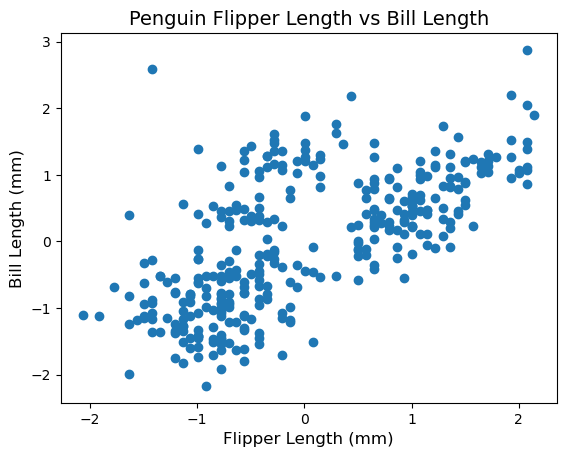

In [7]:
# Scatter plot for bill_length_mm vs flipper_length_mm
plt.scatter(standardized_penguins['flipper_length_mm'], standardized_penguins['bill_length_mm'])

# Adding labels and title
plt.title('Penguin Flipper Length vs Bill Length', fontsize=14)
plt.ylabel('Bill Length (mm)', fontsize=12)
plt.xlabel('Flipper Length (mm)', fontsize=12)

# Display the plot
plt.show()

In [22]:
#Perform K-Means clustering
kmeans = KMeans(n_clusters = 3, random_state=123, n_init=10)

In [23]:
clusters = kmeans.fit(standardized_penguins)

In [24]:
clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,

In [25]:
standardized_penguins_with_clusters = standardized_penguins.copy()

In [26]:
standardized_penguins_with_clusters["Cluster"] = clusters.labels_

In [27]:
standardized_penguins_with_clusters

,bill_length_mm,flipper_length_mm,Cluster
0,-0.884499,-1.418347,1
1,-0.811126,-1.062250,1
2,-0.664380,-0.421277,1
3,-1.324737,-0.563715,1
4,-0.847812,-0.777373,1
...,...,...,...
337,2.178824,0.433355,2
338,-0.077396,0.077258,2
339,1.041543,-0.563715,2
340,1.261662,0.647013,0


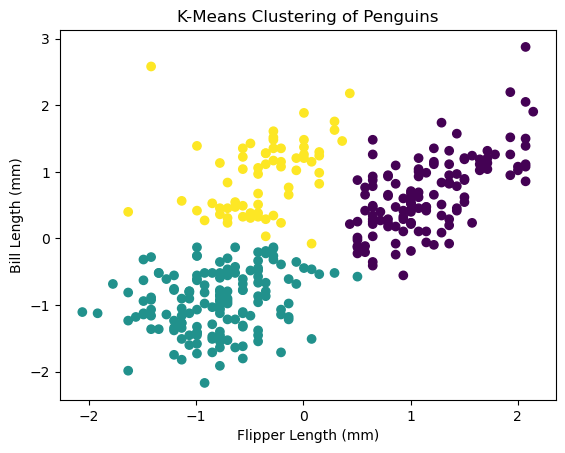

In [28]:
# Plot the clusters
plt.scatter(standardized_penguins_with_clusters['flipper_length_mm'], standardized_penguins_with_clusters['bill_length_mm'], c=standardized_penguins_with_clusters['Cluster'])
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Length (mm)')
plt.title('K-Means Clustering of Penguins')
plt.show()


In [16]:
clusters.inertia_

91.47610853298526

In [43]:
#find optimal value of K
penguin_clust_ks = pd.DataFrame(columns = ["k","wssd"])
penguin_clust_ks

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state=123)
    kmeans.fit(standardized_penguins)
    current_k = pd.DataFrame({"k":[k], "wssd":[kmeans.inertia_]})
    penguin_clust_ks = pd.concat([penguin_clust_ks, current_k], ignore_index=True)

In [44]:
penguin_clust_ks

,k,wssd
0,1,684.000000
1,2,247.016625
2,3,157.815322
3,4,128.451298
4,5,94.061233
5,6,79.419564
6,7,69.965331
7,8,60.616734
8,9,55.030936
9,10,52.111475


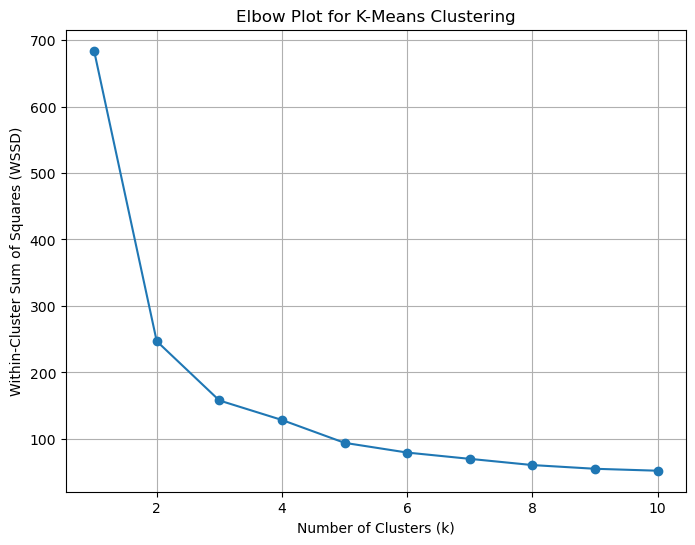

In [21]:
# Create the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(penguin_clust_ks['k'], penguin_clust_ks['wssd'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSSD)')
plt.title('Elbow Plot for K-Means Clustering')
#plt.xticks(penguin_clust_ks['k'])  # Optional: to ensure all k values are shown on the x-axis
plt.grid(True)
plt.show()
